In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def parse_run_name(x):
    dico = {}
    vec = x.split('_')
    dico['Department'] = vec[0]
    dico['Model'] = vec[1]
    i = 2
    if dico['Model']  == 'fwi':
        i += 1
        dico['Target'] = 'indice'
    else:
        dico['Target'] = vec[i]
        i += 1
    if dico['Model'] != 'fwi':
        dico['Task_type'] = vec[i]
        i += 1
        dico['loss'] = vec[i]
        i += 1
        if vec[i] == 'features':
            i += 1
    else:
        dico['loss'] = None
        dico['Task_type'] = 'Indice'

    dico['Number_of_samples'] = vec[i]
    i += 1
    dico['k_days'] = vec[i]
    i += 1
    dico['Number_of_features'] = vec[i]
    i += 1
    dico['Scale'] = int(vec[i])
    i += 1
    dico['Base'] = vec[i]
    i += 1
    dico['Method'] = vec[i]

    return dico

### Task Type

In [12]:
metric = 'bad_prediction_modified_nbsinister_max_1'
df = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/{metric}.csv')

#metric = 'bad_prediction_day_modified_nbsinister_max_1'
#df1 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/{metric}.csv')

metric = 'iou_modified_nbsinister_max_1'
df2 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/{metric}.csv')

#df = df.set_index('Run').join(df1.set_index('Run')['bad_prediction_day_modified_nbsinister_max_1']).reset_index()
df = df.set_index('Run').join(df2.set_index('Run')['iou_modified_nbsinister_max_1']).reset_index()
#df = df.set_index('Run').join(df4.set_index('Run')['bca_class_window_nbsinister_max_5']).reset_index()
#df = df.set_index('Run').join(df5.set_index('Run')['bca_class_window_nbsinister_max_7']).reset_index()

#df.dropna(subset=['temporal_spearman', 'temporal_mae', 'temporal_binary_f1', 'temporal_kendall'], inplace=True)
df.drop_duplicates(inplace=True, keep='first')
df.reset_index(drop=True, inplace=True)

In [13]:
df

,Run,Run ID,bad_prediction_modified_nbsinister_max_1,iou_modified_nbsinister_max_1
0,departement-01-ain_dt-dt-dt_nbsinister_regress...,6d71f42ee62b45279eacb65a94af1fc2,0.90,0.04
1,departement-01-ain_rf-rf-rf_nbsinister_regress...,1ac733639e9a46a898f6dd4012dcbb28,0.81,0.13
2,departement-01-ain_rf-rf-rf_nbsinister_regress...,9dac9df27b7349f2a71a288345294b0a,0.78,0.15
3,departement-01-ain_unique-cluster_encoder-xgbo...,f63a292281b24f1f81161a28c66e387f,0.82,0.12
4,departement-01-ain_unique-cluster_encoder-xgbo...,8813b2ffe78846bea2fccb0102049d71,0.79,0.16
5,departement-01-ain_unique-departement-xgboost_...,fffecfd99f22423fa5fe87c4d9b45747,0.82,0.12
6,departement-01-ain_unique-departement-xgboost_...,fffecfd99f22423fa5fe87c4d9b45747,0.82,NaN
7,departement-01-ain_unique-departement-xgboost_...,04fb689016aa428d92c5ee958d84f6d8,0.82,0.12
8,departement-01-ain_unique-departement-xgboost_...,04fb689016aa428d92c5ee958d84f6d8,0.82,NaN
9,departement-01-ain_unique-departement-xgboost_...,61758a4942064f99a353c49aec1afa79,NaN,0.12


In [16]:
# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Loss_function'] = None
df['Number_of_samples'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('Loss_function')
    df.loc[index, 'Number_of_samples'] = dico_parse.get('Number_of_samples')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')

df = df[df['Model'] == 'xgboost']

In [17]:
df

,Run,Run ID,bad_prediction_modified_nbsinister_max_1,iou_modified_nbsinister_max_1,Department,Model,Target,Task_type,Loss_function,Number_of_samples,kdays,Number_of_features,Scale,Base,Method
21,departement-01-ain_xgboost_binary_classificati...,648c1356c1064cd1a4c004f43e405ae9,0.82,0.12,departement-01-ain,xgboost,binary,classification,None,full,None,all,4,risk-size-watershed,node
22,departement-01-ain_xgboost_nbsinister_regressi...,348f3d8e16d542acb13b29d77e8bfcb1,NaN,NaN,departement-01-ain,xgboost,nbsinister,regression,None,binary,None,all,4,risk-size-watershed,node
23,departement-01-ain_xgboost_nbsinister_regressi...,f6a98d0a80e84e389de49191924e3ef5,NaN,NaN,departement-01-ain,xgboost,nbsinister,regression,None,binary,None,all,4,risk-size-watershed,node
24,departement-01-ain_xgboost_nbsinister_regressi...,7f6a0a4feb61486c8978294235fb4906,NaN,NaN,departement-01-ain,xgboost,nbsinister,regression,None,binary,None,all,4,risk-size-watershed,node
25,departement-01-ain_xgboost_nbsinister_regressi...,1896017fe9924b0aa1c1b583f41086f1,0.82,0.12,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,4,risk-size-watershed,node
26,departement-01-ain_xgboost_risk_regression_rms...,bdc4427e7405429991dac1c189fea298,0.83,0.13,departement-01-ain,xgboost,risk,regression,None,full,None,all,4,risk-size-watershed,node
38,departement-25-doubs_xgboost_binary_classifica...,4146b80f6d6d49698bbee24c1051a055,0.82,0.13,departement-25-doubs,xgboost,binary,classification,None,full,None,all,4,risk-size-watershed,node
39,departement-25-doubs_xgboost_nbsinister_regres...,fc38c70ed04c41c19bb93ea34fa1da42,0.82,0.12,departement-25-doubs,xgboost,nbsinister,regression,None,full,None,all,4,risk-size-watershed,node
40,departement-25-doubs_xgboost_risk_regression_r...,43d1de4db73f4da1b9bf5175b6a5bf4c,0.84,0.11,departement-25-doubs,xgboost,risk,regression,None,full,None,all,4,risk-size-watershed,node
50,departement-78-yvelines_xgboost_binary_classif...,24f8a13e406e4ac5a980848ca21e14fa,0.66,0.24,departement-78-yvelines,xgboost,binary,classification,None,full,None,all,4,risk-size-watershed,node


In [7]:
def parser_task_type(x):
    if x == 'risk':
        return 'Risk prediction'
    elif x == 'nbsinister':
        return 'Sinister prediction'
    elif x == 'binary':
        return 'Probability prediction'

In [8]:
df['task_type'] = df['Target'].apply(lambda x : parser_task_type(x))
df = df.sort_values(['Scale', 'Department'])

In [9]:
def compare_task_type(depts, dept_markers):
    metrics =  ['bad_prediction_modified_nbsinister_max_1', 'bad_prediction_day_modified_nbsinister_max_1', 'iou_modified_nbsinister_max_1']
    task_types = ['Risk prediction', 'Sinister prediction', 'Probability prediction']
    
    # Define colors for each task type
    task_colors = {
        'Risk prediction': 'c',
        'Sinister prediction': 'm',
        'Probability prediction': 'y'
    }

    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(15, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]
            for method in task_types:
                subset = df_filtered[df_filtered['task_type'] == method]
                # Add label only for the first occurrence of each method
                label = method if dept_index == 0 else None  # Only show labels for the first department
                ax.plot(subset['Scale'], subset[metric], marker=dept_markers[dept], linestyle='-', 
                        label=label, color=task_colors[method])  # Use task type color

            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel('Scale')
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine both legends
    fig.legend(handles=task_handles + dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

KeyError: 'bad_prediction_day_modified_nbsinister_max_1'

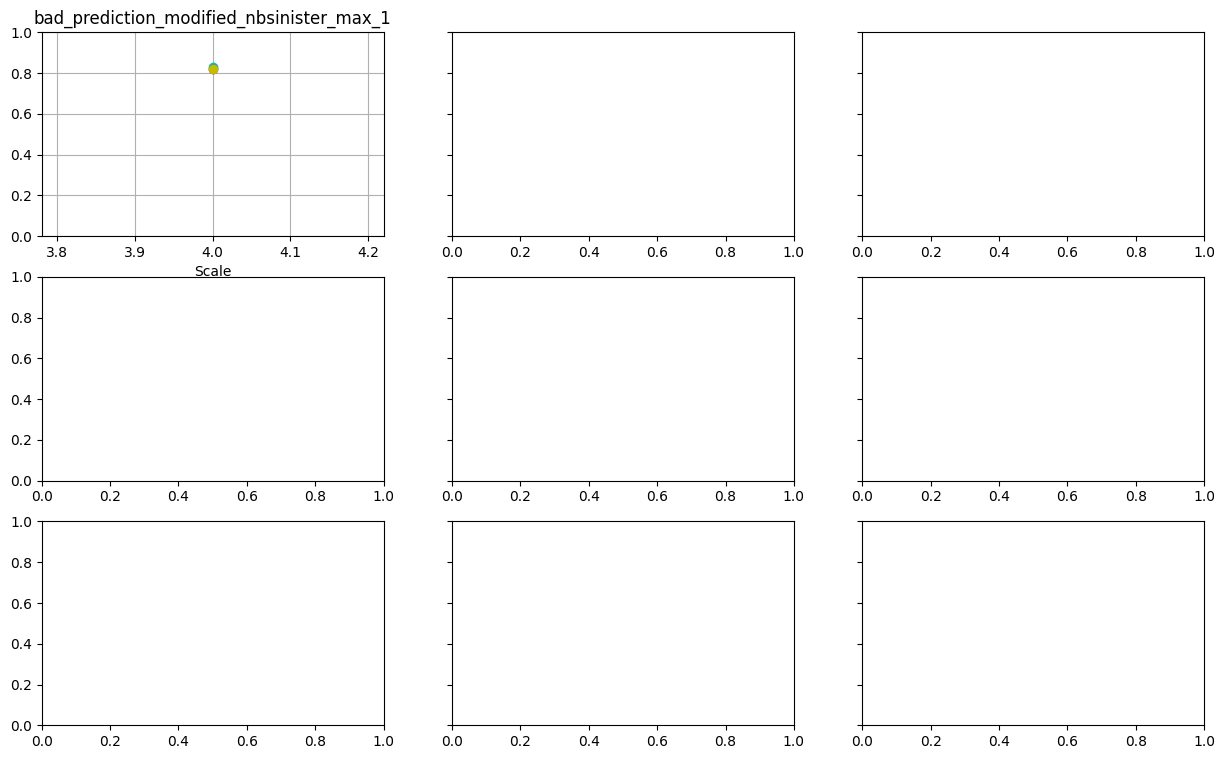

In [10]:
# Define markers for each department
dept_markers = {
    'departement-01-ain': 'o',   # Circle
    'departement-25-doubs': 's',   # Square
    'departement-78-yvelines': 'D',   # Diamond
    # Add more departments and their markers as needed
}
compare_task_type(df.Department.unique(), dept_markers)

### Accuracy

In [373]:
metric = 'accuracy_accuracy'
df = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

df.dropna(subset=['temporal_accuracy_accuracy'], inplace=True)
df.drop_duplicates(inplace=True, keep='first')

In [374]:
# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Loss_function'] = None
df['Number_of_samples'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('Loss_function')
    df.loc[index, 'Number_of_samples'] = dico_parse.get('Number_of_samples')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')

df = df[df['Model'] == 'xgboost']

In [375]:
df.rename({'temporal_accuracy_accuracy' : 'Accuracy'}, inplace=True, axis=1)

df['task_type'] = df['Target'].apply(lambda x : parser_task_type(x))
df = df.sort_values('Scale')

In [376]:
def compare_task_type_acc(depts, dept_markers):
    metrics = ['Accuracy']
    task_types = ['xgboost']
    
    # Define colors for each task type
    task_colors = {
        'xgboost': 'm',
    }

    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(15, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index] if len(depts) > 1 else axs[metric_index]
            for method in task_types:
                subset = df_filtered[df_filtered['Model'] == method]
                # Add label only for the first occurrence of each method
                label = method if dept_index == 0 else None  # Only show labels for the first department
                ax.plot(subset['Scale'], subset[metric], marker=dept_markers[dept], linestyle='-', 
                        label=label, color=task_colors[method])  # Use task type color

            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel('Scale')
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine both legends
    fig.legend(handles=task_handles + dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

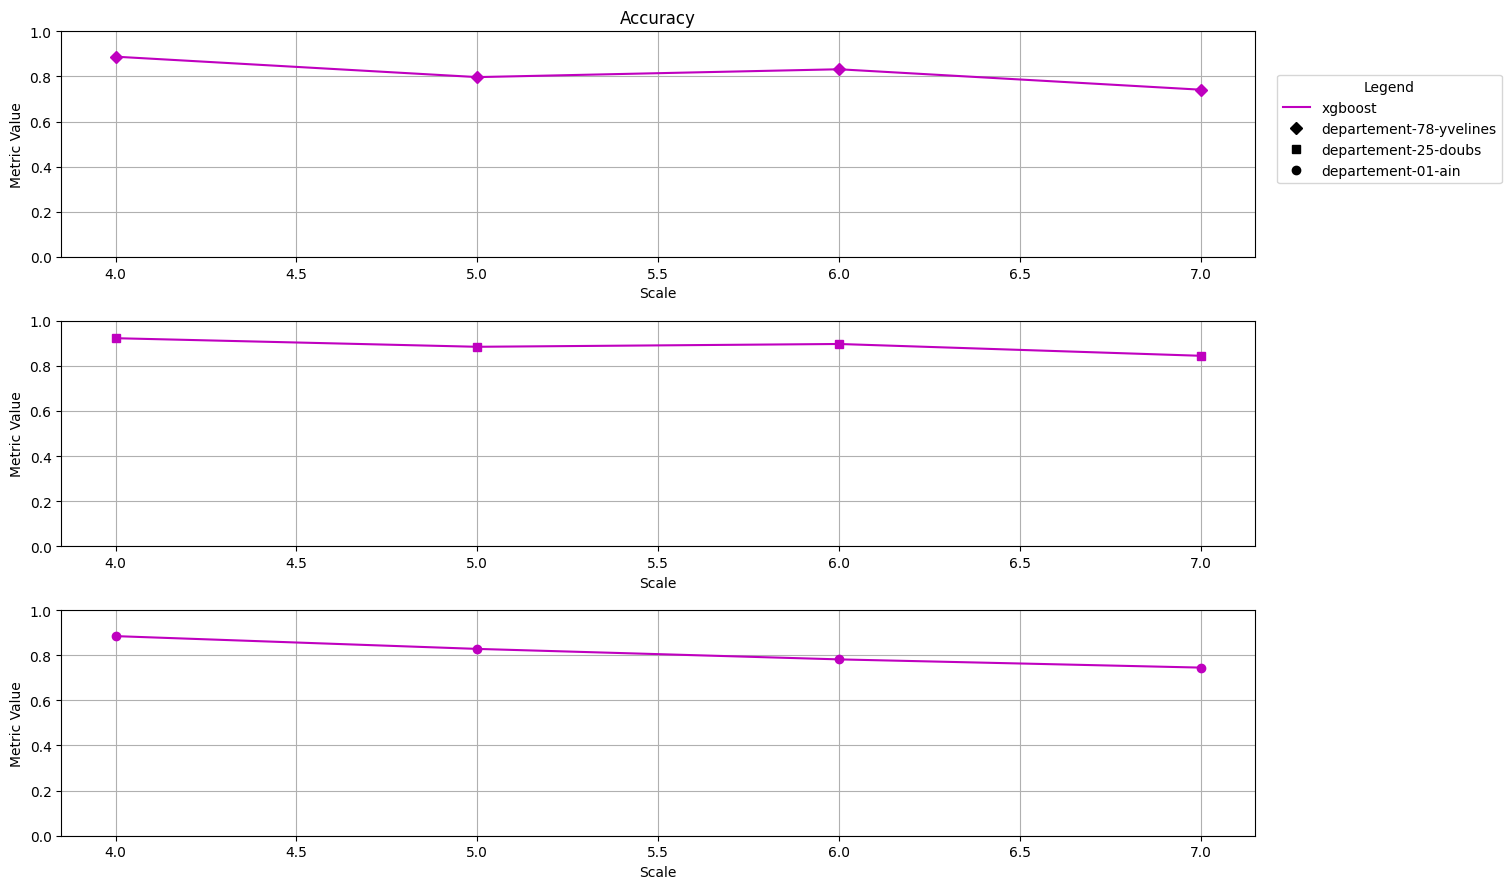

In [377]:
# Define markers for each department
dept_markers = {
    'departement-01-ain': 'o',   # Circle
    'departement-25-doubs': 's',   # Square
    'departement-78-yvelines': 'D',   # Diamond
    # Add more departments and their markers as needed
}
compare_task_type_acc(df.Department.unique(), dept_markers)

### Regular vs Watershed

In [122]:
metric = 'bad_prediction_modified_nbsinister_max_1'
df = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/{metric}.csv')

#metric = 'bad_prediction_day_modified_nbsinister_max_1'
#df1 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/{metric}.csv')

metric = 'iou_modified_nbsinister_max_1'
df2 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/{metric}.csv')

#df = df.set_index('Run').join(df1.set_index('Run')['bad_prediction_day_modified_nbsinister_max_1']).reset_index()
df = df.set_index('Run').join(df2.set_index('Run')['iou_modified_nbsinister_max_1']).reset_index()
#df = df.set_index('Run').join(df4.set_index('Run')['bca_class_window_nbsinister_max_5']).reset_index()
#df = df.set_index('Run').join(df5.set_index('Run')['bca_class_window_nbsinister_max_7']).reset_index()

#df.dropna(subset=['temporal_spearman', 'temporal_mae', 'temporal_binary_f1', 'temporal_kendall'], inplace=True)
df.drop_duplicates(inplace=True, keep='first')
df.reset_index(drop=True, inplace=True)

In [124]:
# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Loss_function'] = None
df['Number_of_samples'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('Loss_function')
    df.loc[index, 'Number_of_samples'] = dico_parse.get('Number_of_samples')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')

df = df[df['Model'] == 'xgboost']
df = df[df['Target'] == 'nbsinister']

In [125]:
df

,Run,Run ID,apr_nbsinister,bca_class_window_nbsinister_max_1,bca_class_window_nbsinister_max_3,bca_class_window_nbsinister_max_5,bca_class_window_nbsinister_max_7,Department,Model,Target,Task_type,Loss_function,Number_of_samples,kdays,Number_of_features,Scale,Base,Method
0,departement-78-yvelines_xgboost_nbsinister_reg...,245edf3b792b4e9db8132b715f555ad2,0.57,0.23,0.43,0.36,0.48,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,7,risk-regular,node
2,departement-25-doubs_xgboost_nbsinister_regres...,4069c6806b624d44b4d82ea2ad2d2071,0.33,0.40,0.48,0.52,0.49,departement-25-doubs,xgboost,nbsinister,regression,None,full,None,all,7,risk-regular,node
4,departement-01-ain_xgboost_nbsinister_regressi...,c2b3a9e8e7ae46a5999d7e7b99bf210e,0.41,0.30,0.36,0.34,0.39,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,7,risk-regular,node
6,departement-78-yvelines_xgboost_nbsinister_reg...,3aeb4183e2924294aab7795d9587cdc8,0.49,0.55,0.34,0.42,0.44,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,6,risk-regular,node
8,departement-25-doubs_xgboost_nbsinister_regres...,e7ab9623fec94bc693f280d7130115d2,0.38,0.42,0.25,0.24,0.31,departement-25-doubs,xgboost,nbsinister,regression,None,full,None,all,6,risk-regular,node
10,departement-01-ain_xgboost_nbsinister_regressi...,975a3b99b92d4d8684f2ab9babde2f61,0.41,0.33,0.42,0.46,0.37,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,6,risk-regular,node
12,departement-78-yvelines_xgboost_nbsinister_reg...,dd6048c886ff4ff3a0f174d1d13e3332,0.43,0.37,0.29,0.58,0.61,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,5,risk-regular,node
14,departement-25-doubs_xgboost_nbsinister_regres...,8ae3c2daa20a4adaade81439540431d3,0.23,0.55,0.58,0.56,0.56,departement-25-doubs,xgboost,nbsinister,regression,None,full,None,all,5,risk-regular,node
16,departement-01-ain_xgboost_nbsinister_regressi...,9b0c5a11aa2d48bd919f988ca417821a,0.23,0.43,0.27,0.38,0.39,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,5,risk-regular,node
19,departement-78-yvelines_xgboost_nbsinister_reg...,d32c4d6b730d4ce8be682b8cab522a2e,0.56,0.38,0.40,0.52,0.41,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,7,risk-size-watershed,node


In [137]:
df.rename({
    'bca_class_window_nbsinister_max_1': 'bca_nbsinister_max_1',
    'bca_class_window_nbsinister_max_3': 'bca_nbsinister_max_3',
    'bca_class_window_nbsinister_max_5': 'bca_nbsinister_max_5',
    'bca_class_window_nbsinister_max_7': 'bca_nbsinister_max_7'
}, inplace=True, axis=1)

In [139]:
df.loc[df[df['Base'] == 'risk-size-watershed'].index, 'Base'] = 'Watershed'
df.loc[df[df['Base'] == 'risk-regular'].index, 'Base'] = 'Regular'

In [140]:
df = df.sort_values(['Scale', 'Department'])

In [141]:
def compare_segmentation(depts, dept_markers):
    metrics = ['apr_nbsinister', 'bca_nbsinister_max_1', 'bca_nbsinister_max_3', 'bca_nbsinister_max_5', 'bca_nbsinister_max_7']
    task_types = ['Watershed', 'Regular']
    
    # Define colors for each task type
    task_colors = {
        'Watershed': 'c',
        'Regular': 'y',
    }

    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(15, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]
            for method in task_types:
                subset = df_filtered[df_filtered['Base'] == method]
                # Add label only for the first occurrence of each method
                label = method if dept_index == 0 else None  # Only show labels for the first department
                ax.plot(subset['Scale'], subset[metric], marker=dept_markers[dept], linestyle='-', 
                        label=label, color=task_colors[method])  # Use task type color

            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel('Scale')
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine both legends
    fig.legend(handles=task_handles + dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

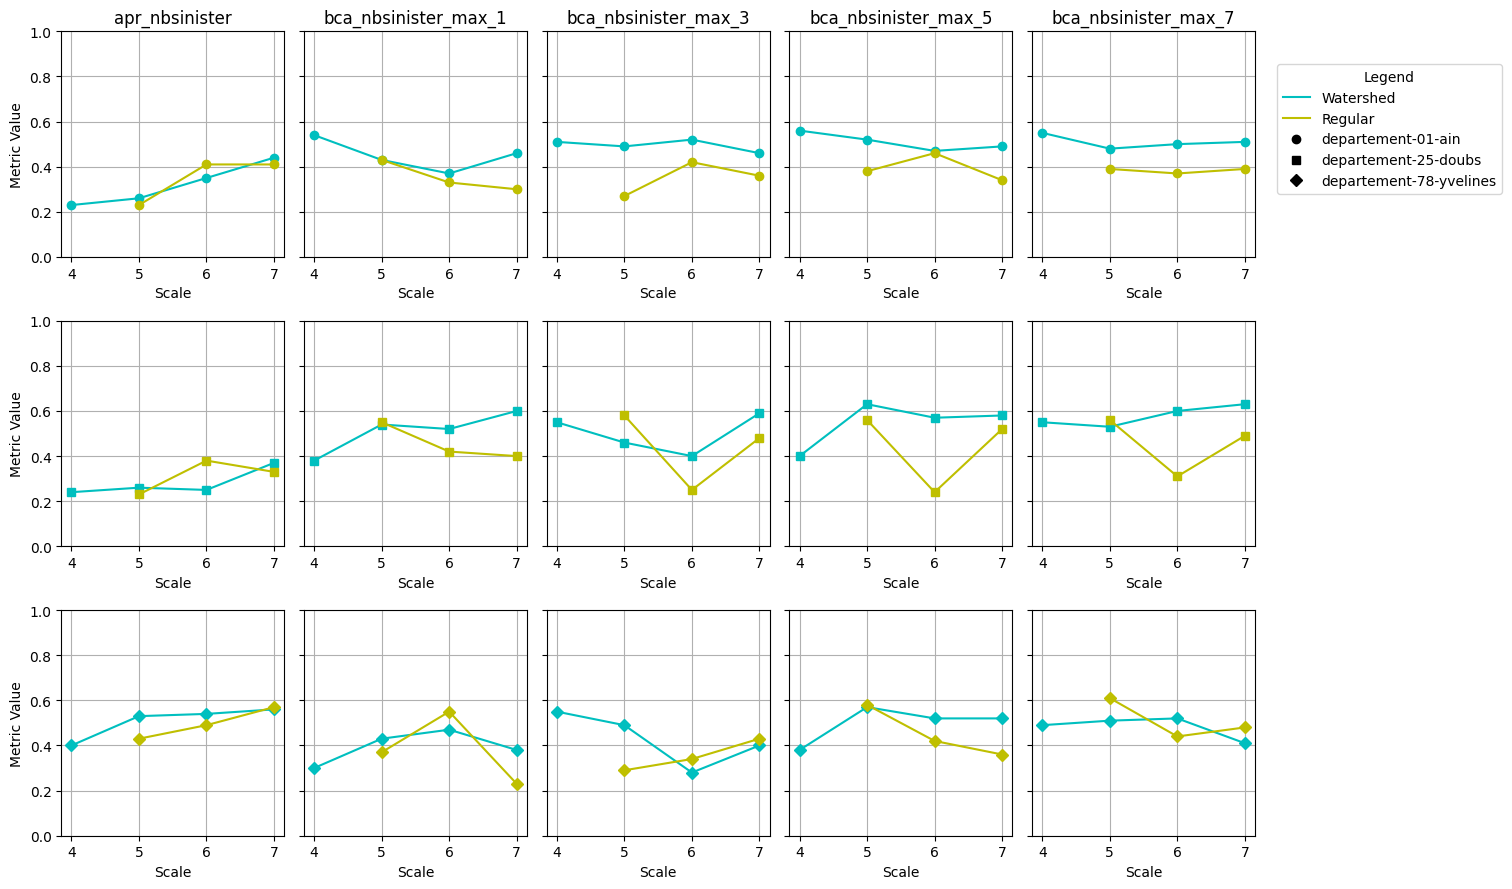

In [142]:
# Define markers for each department
dept_markers = {
    'departement-01-ain': 'o',   # Circle
    'departement-25-doubs': 's',   # Square
    'departement-78-yvelines': 'D',   # Diamond
    # Add more departments and their markers as needed
}
compare_segmentation(df.Department.unique(), dept_markers)

### Models

In [22]:
metric = 'bad_prediction_modified_nbsinister_max_1'
df = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/{metric}.csv')

#metric = 'bad_prediction_day_modified_nbsinister_max_1'
#df1 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/{metric}.csv')

metric = 'iou_modified_nbsinister_max_1'
df2 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/{metric}.csv')

#df = df.set_index('Run').join(df1.set_index('Run')['bad_prediction_day_modified_nbsinister_max_1']).reset_index()
df = df.set_index('Run').join(df2.set_index('Run')['iou_modified_nbsinister_max_1']).reset_index()
#df = df.set_index('Run').join(df4.set_index('Run')['bca_class_window_nbsinister_max_5']).reset_index()
#df = df.set_index('Run').join(df5.set_index('Run')['bca_class_window_nbsinister_max_7']).reset_index()

#df.dropna(subset=['temporal_spearman', 'temporal_mae', 'temporal_binary_f1', 'temporal_kendall'], inplace=True)
df.drop_duplicates(inplace=True, keep='first')
df.reset_index(drop=True, inplace=True)

In [23]:
df.loc[10]['Run']

'departement-01-ain_unique-departement-xgboost_nbsinister_regression_rmse_features_binary_0_all_4_risk-size-watershed_node_None_weight_outlier_2'

In [24]:
df.loc[11]['Run']

'departement-01-ain_unique-departement-xgboost_nbsinister_regression_rmse_features_binary_0_all_4_risk-size-watershed_node_None_weight_outlier_2'

In [25]:
# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Loss_function'] = None
df['Number_of_samples'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('Loss_function')
    df.loc[index, 'Number_of_samples'] = dico_parse.get('Number_of_samples')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')

df = df[df['Base'] == 'risk-size-watershed']
print(df.Target.unique())
df = df[df['Target'].isin(['nbsinister', 'indice'])]

['nbsinister' 'binary' 'risk']


In [26]:
df = df.sort_values(['Scale', 'Department']).reset_index(drop=True)
df.loc[df[df['Model'] == "Zhang"].index, 'Model'] = 'ConvNet'
df.loc[df[df['Model'] == "pastinfluence"].index, 'Model'] = 'Persis'
df.drop_duplicates(inplace=True)

In [39]:
import seaborn as sns
def compare_models2(depts, dept_markers, metrics):
    task_types = df.Model.unique()

    np.random.seed(42)  # Pour rendre le code reproductible (vous pouvez le changer ou le retirer)
    colors = sns.color_palette("husl", len(task_types))  # Palette de couleurs diversifiée et aléatoire

    #Associer chaque modèle à une couleur
    task_colors = dict(zip(task_types, colors))
    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(15, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]
            for method in task_types:
                subset = df_filtered[df_filtered['Model'] == method]

                if len(subset) == 0:
                    continue

                subset = subset.sort_values('Scale')
                print(subset['Scale'].values)
                # Add label only for the first occurrence of each method
                label = method if dept_index == 0 else None  # Only show labels for the first department
                ax.plot(subset['Scale'].values, subset[metric].values, marker=dept_markers[dept], linestyle='-', 
                        label=label, color=task_colors[method])  # Use task type color
                
            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel('Scale')
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine both legends
    fig.legend(handles=task_handles + dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

In [41]:
def compare_models(depts, dept_markers):
    metrics = ['bad_prediction_modified_nbsinister_max_1', 'iou_modified_nbsinister_max_1']
    task_types = df.model.unique()
    
    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(25, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]
            
            # Loop through all models and plot them
            for method in task_types:
                # Skip specific conditions (e.g., 'fwi' and 'mae')
                if (method == 'fwi' or method == 'Persis' or method == 'GT') and metric == 'MAE':
                    continue
                # Filter the subset of the data for the specific model
                subset = df_filtered[df_filtered['Model'] == method]

                subset = subset.sort_values('Scale')

                if len(subset) == 0:
                    continue
                
                # Retrieve the metric value and apply the cap if necessary
                metric_value = subset[metric].values[0]
                capped_value = min(metric_value, 1.0)  # Cap value at 1.0 for plotting

                # Plot the metric for the model
                ax.plot(subset['Model'].values[0], capped_value, marker=dept_markers[dept], linestyle='-', c='b')

                # If the metric value exceeds 1.0, add a text label showing the original value
                if metric_value > 1.0:
                    ax.text(subset['Model'].values[0], 0.95, f'{metric_value:.2f}', 
                            ha='center', va='top', fontsize=10, color='blue')

            # Set metric names and labels
            ax.set_ylim(0, 1.05)
            ax.set_xlabel('Model')
            
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for departments only (model names are now on X-axis)
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine legends (only departments now)
    fig.legend(handles=dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")
    plt.legend()
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

[4]
[4 5]
[4 4 4 4 4 4 4 4 4 4 4 4 5 6]
[4 4 4 4]
[4]
[4 5]
[4 4 4 4 4 4 4 4 4 4 4 4 5 6]
[4 4 4 4]
[4]
[4 5]
[4 4 5 6]
[4]
[4]
[4 5]
[4 4 5 6]
[4]
[4]
[4]
[4 4 5]
[4]
[4]
[4]
[4 4 5]
[4]


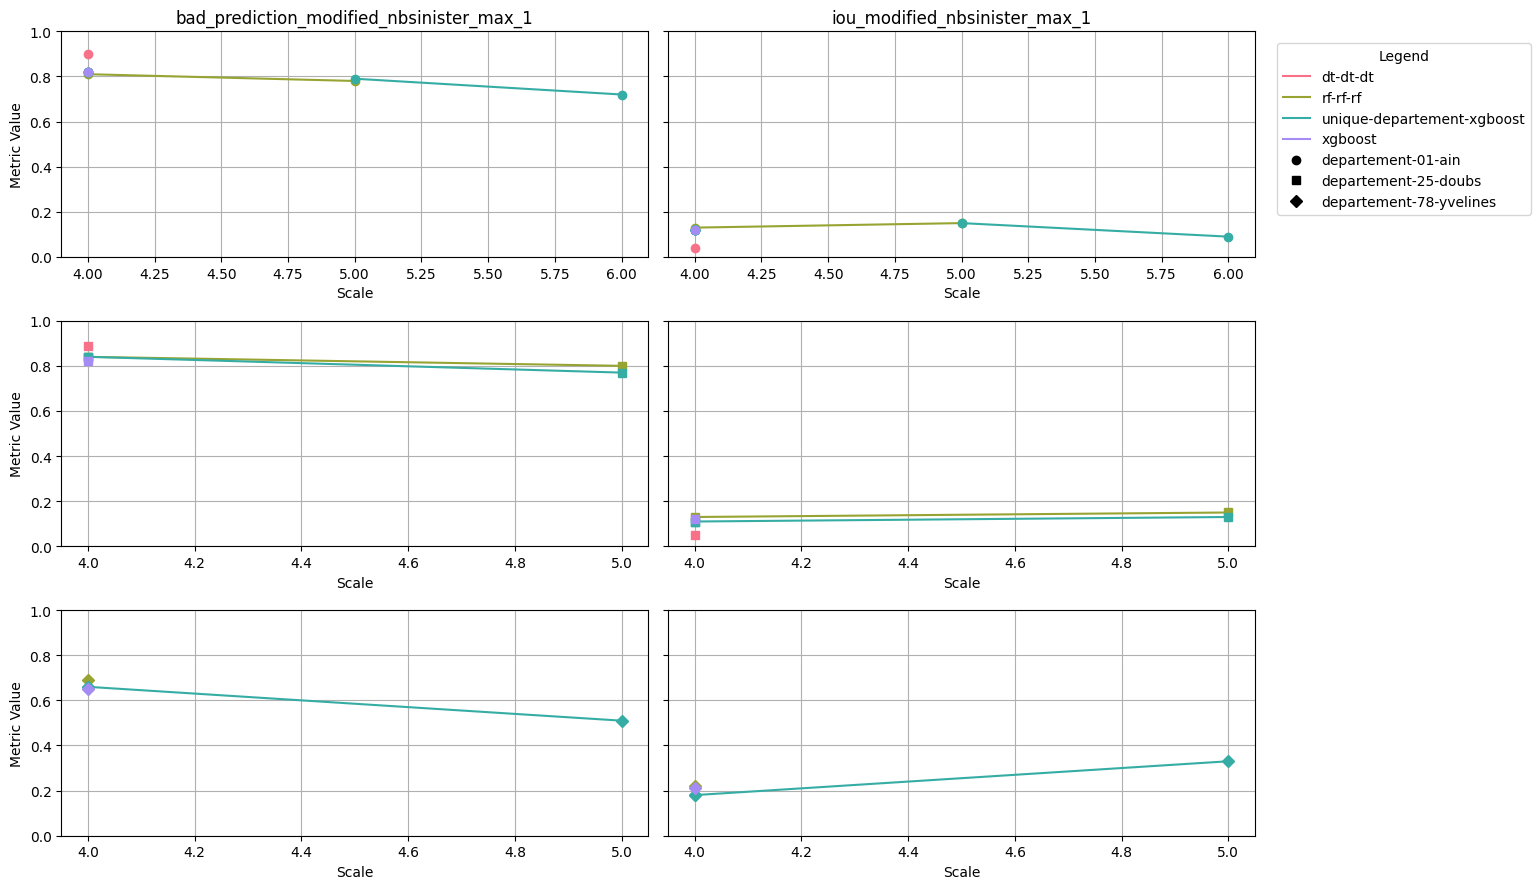

In [42]:
# Define markers for each department
dept_markers = {
    'departement-01-ain': 'o',   # Circle
    'departement-25-doubs': 's',   # Square
    'departement-78-yvelines': 'D',   # Diamond
    # Add more departments and their markers as needed
}
metrics =  ['bad_prediction_modified_nbsinister_max_1', 'iou_modified_nbsinister_max_1']

compare_models2(df.Department.unique(), dept_markers, metrics)

###